# Libraries

In [60]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
import torch
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.neural_network import MLPRegressor
from tqdm import tqdm

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Import data

In [77]:
# For training the model
X_train = pd.read_csv("../../X/train_v1.csv", index_col=[0])

# For cross validation
X_valid = pd.read_csv("../../X/valid_v1.csv", index_col=[0])

# For prediction
X_test = pd.read_csv("../../X/test_v1.csv", index_col=[0])

y_train_t2 = pd.read_csv("../../Task2/Y_train.csv")
y_valid_t2 = pd.read_csv("../../Task2/Y_valid.csv")
y_train_t2_value=y_train_t2["los_icu"]
y_valid_t2_value=y_valid_t2["los_icu"]

final_index = X_test.index

In [78]:
# Impute the 0 with mean
imp = SimpleImputer(missing_values=0, strategy='mean')
X_train_nozero = pd.DataFrame(imp.fit_transform(X_train))
X_valid_nozero = pd.DataFrame(imp.fit_transform(X_valid))
X_test_nozero = pd.DataFrame(imp.fit_transform(X_test))
X_train_nozero

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,-2.039985,1.170093,-1.109747,0.792807,0.090101,1.478921,-0.638602,-1.069743,-0.047438,0.528476,...,-1.979855,-1.694872,0.869070,0.381991,-0.226618,0.079840,0.442871,0.000309,0.021107,0.919751
1,0.793194,-0.061390,0.702851,1.737977,1.369469,0.198395,1.537514,-1.044218,0.013225,0.989874,...,-0.251806,-1.444821,2.806903,1.307294,-0.254291,0.036593,-0.812489,0.000309,-0.255019,0.044903
2,-1.561656,0.546114,0.145354,-0.439621,-0.739112,0.161234,1.723172,-0.858553,-0.046173,0.377241,...,0.061017,1.019964,-0.476014,-1.941549,-0.271686,0.569831,0.100500,0.000309,-0.301820,0.044903
3,0.728804,-0.029561,-0.151030,-0.439621,-0.128434,-0.211957,-0.661305,-0.079990,0.013225,0.350605,...,0.061017,0.484141,0.071139,0.006806,-0.136461,0.036593,-0.015089,0.000309,-0.060128,0.044903
4,-1.074128,-0.101854,-0.181217,0.348021,0.186551,-0.341346,0.603034,-0.726826,-0.049916,-1.003401,...,0.061017,-1.694872,0.823474,0.006806,-0.136461,-0.308454,-0.015089,-1.333059,-0.071559,-0.809195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16755,0.039265,-1.432434,-0.036621,-0.200239,-0.575247,-0.894033,0.667703,-0.598336,0.013225,-0.467718,...,1.044231,0.091204,-0.236635,-0.070380,-0.136461,0.036593,-0.127747,0.000309,-0.348621,0.044903
16756,0.039265,0.370595,0.325411,-0.331513,-0.420184,-0.841322,-0.389591,-0.004140,0.013225,0.874450,...,0.061017,-2.230694,0.481503,0.265471,-0.136461,0.036593,-0.263269,0.000309,-0.161417,0.044903
16757,0.039265,-0.518391,0.006264,0.116362,-0.131727,-0.629821,-1.128922,-0.389777,-0.018729,-0.926452,...,1.044231,1.448622,-0.270832,0.006806,-0.261407,0.036593,-0.015089,0.000309,-0.056114,-0.468319
16758,0.039265,1.023920,0.052558,-0.219544,-0.491283,-0.077771,2.021813,1.028054,0.013225,0.173031,...,0.061017,-0.051682,-0.937674,-2.976518,-0.136461,0.036593,5.007816,0.000309,-0.372021,0.044903


In [79]:
scaler = preprocessing.StandardScaler()

X_train=X_train.values
X_train= scaler.fit_transform(X_train)
X_train=pd.DataFrame(X_train)

X_valid=X_valid.values
X_valid= scaler.fit_transform(X_valid)
X_valid=pd.DataFrame(X_valid)

X_test=X_test.values
X_test= scaler.fit_transform(X_test)
X_test=pd.DataFrame(X_test)

In [80]:

X_train_norm = X_train
X_valid_norm = X_valid
X_test_norm = X_test

print(X_train_norm.shape)
print(X_valid_norm.shape)
print(X_test_norm.shape)


(16760, 55)
(2394, 55)
(4790, 55)


In [81]:
y_train_t2_value

0        6.064560
1        3.672917
2        5.323056
3        1.584410
4        7.634815
           ...   
16755    1.703391
16756    2.731933
16757    7.949259
16758    3.142616
16759    2.161481
Name: los_icu, Length: 16760, dtype: float64

# Evaluation Matrix

In [82]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

# Hyperparameter and setting tuning

## Layer Choices

100%|█████████████████████████████████████████| 171/171 [25:05<00:00,  8.81s/it]


[(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (1, 13), (1, 14), (1, 15), (1, 16), (1, 17), (1, 18), (1, 19), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (2, 10), (2, 11), (2, 12), (2, 13), (2, 14), (2, 15), (2, 16), (2, 17), (2, 18), (2, 19), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (3, 10), (3, 11), (3, 12), (3, 13), (3, 14), (3, 15), (3, 16), (3, 17), (3, 18), (3, 19), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (4, 10), (4, 11), (4, 12), (4, 13), (4, 14), (4, 15), (4, 16), (4, 17), (4, 18), (4, 19), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7), (5, 8), (5, 9), (5, 10), (5, 11), (5, 12), (5, 13), (5, 14), (5, 15), (5, 16), (5, 17), (5, 18), (5, 19), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6), (6, 7), (6, 8), (6, 9), (6, 10), (6, 11), (6, 12), (6, 13), (6, 14), (6, 15), (6, 16), (6, 17), (6, 18), (6, 19), (7, 1), (7, 2), (7, 3), (7,

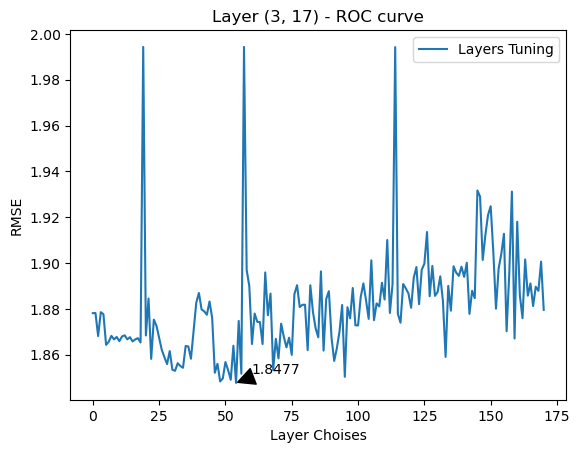

In [83]:
layer_list = []
rmse_lst=[]

for x in range (1,10,1):
    for y in range (1,20,1):
        layer_list.append((x,y))

for j in tqdm(range(len(layer_list))):
    i = layer_list[j]
    clf = MLPRegressor(solver="adam",
                       alpha=1e-5,
                       hidden_layer_sizes=i,
                       activation='relu',
                       random_state=3612,
                       max_iter=1000)

    clf.fit(X_train_norm, y_train_t2_value)
    y_pred = clf.predict(X_valid_norm)
    rmse1 = rmse(y_pred, y_valid_t2_value)
    rmse_lst.append(rmse1)
    
print(layer_list)
index = rmse_lst.index(min(rmse_lst))
plt.plot(list(range(len(layer_list))), rmse_lst, label='Layers Tuning')
plt.xlabel('Layer Choises')
plt.ylabel('RMSE')
plt.title(f"Layer {layer_list[index]} - ROC curve")
plt.legend(loc="best")
plt.annotate(np.min(rmse_lst).round(4), (np.argmin(rmse_lst), np.min(rmse_lst)), xycoords="data",
                 xytext=(40, 20), textcoords="offset pixels", arrowprops=dict(facecolor="black", shrink=0.1), fontsize=10,
                 horizontalalignment="center", verticalalignment="top")
plt.show()

In [99]:
best_layernumber = layer_list[index]
best_layernumber

(1, 4)

## Solver Choices

/home/fish/anaconda3/envs/comp3340/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


['lbfgs', 'sgd', 'adam']


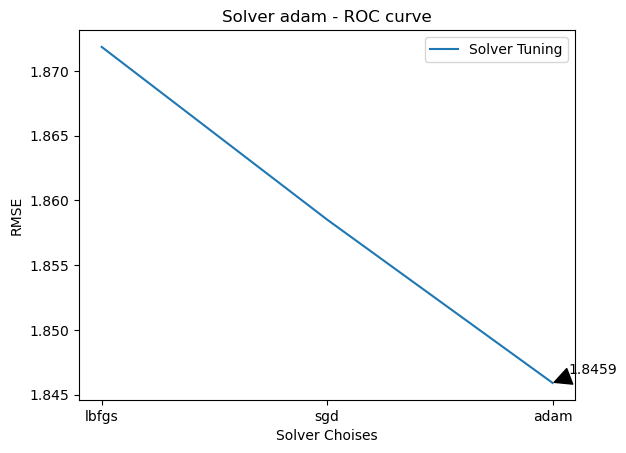

In [85]:
solver_list = ["lbfgs","sgd","adam"]
rmse_lst=[]

for i in solver_list:
    clf = MLPRegressor(solver=i,
                        alpha=1e-5,
                        hidden_layer_sizes=best_layernumber,
                        random_state=1,
                        activation='relu',
                        max_iter=1000)

    clf.fit(X_train_norm, y_train_t2_value)
    y_pred = clf.predict(X_valid_norm)
    rmse1 = rmse(y_pred, y_valid_t2_value)
    rmse_lst.append(rmse1)
    
print(solver_list)
index = rmse_lst.index(min(rmse_lst))
plt.plot(solver_list, rmse_lst, label='Solver Tuning')
plt.xlabel('Solver Choises')
plt.ylabel('RMSE')
plt.title(f"Solver {solver_list[index]} - ROC curve")
plt.legend(loc="best")
plt.annotate(np.min(rmse_lst).round(4), (np.argmin(rmse_lst), np.min(rmse_lst)), xycoords="data",
                 xytext=(40, 20), textcoords="offset pixels", arrowprops=dict(facecolor="black", shrink=0.1), fontsize=10,
                 horizontalalignment="center", verticalalignment="top")
plt.show()

In [86]:
index = np.argmin(rmse_lst)
best_solver = solver_list[index]
best_solver

'adam'

## Learning rate tuning

[1e-10, 0.0001, 0.001, 0.0032500000000000003, 0.0055000000000000005, 0.007750000000000001, 0.01, 0.01, 0.0325, 0.05500000000000001, 0.0775, 0.1, 0.1, 0.325, 0.55, 0.775, 1.0]


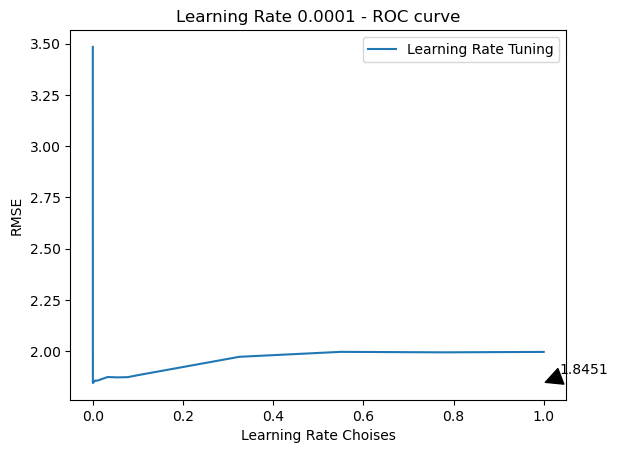

1.8451


In [87]:
lr_list = [1e-10,0.0001]+list(np.linspace(0.001,0.01,5))+list(np.linspace(0.01,0.1,5))+list(np.linspace(0.1,1,5))
rmse_lst=[]

for i in lr_list:
    clf = MLPRegressor(solver=best_solver,
                        hidden_layer_sizes=best_layernumber,
                        learning_rate_init=i,
                        learning_rate="adaptive", 
                        alpha=1e-5,
                        random_state=1,
                        activation='relu',
                        max_iter=1000)

    clf.fit(X_train_norm, y_train_t2_value)
    y_pred = clf.predict(X_valid_norm)
    rmse1 = rmse(y_pred, y_valid_t2_value)
    rmse_lst.append(rmse1)
    
print(lr_list)
index = rmse_lst.index(min(rmse_lst))
plt.plot(lr_list, rmse_lst, label='Learning Rate Tuning')
plt.xlabel('Learning Rate Choises')
plt.ylabel('RMSE')
plt.title(f"Learning Rate {lr_list[index]} - ROC curve")
plt.legend(loc="best")
plt.annotate(np.min(rmse_lst).round(4), (np.argmin(rmse_lst), np.min(rmse_lst)), xycoords="data",
                 xytext=(40, 20), textcoords="offset pixels", arrowprops=dict(facecolor="black", shrink=0.1), fontsize=10,
                 horizontalalignment="center", verticalalignment="top")
plt.show()
print(np.min(rmse_lst).round(4))

In [88]:
index = np.argmin(rmse_lst)
best_lr_choice =  lr_list[index]
best_lr_choice

0.0001

## Regularization strength tuning

[1e-05, 1.2105263157894737e-05, 1.4210526315789475e-05, 1.6315789473684213e-05, 1.842105263157895e-05, 2.0526315789473685e-05, 2.2631578947368423e-05, 2.473684210526316e-05, 2.6842105263157896e-05, 2.8947368421052637e-05, 3.105263157894737e-05, 3.3157894736842106e-05, 3.526315789473685e-05, 3.736842105263158e-05, 3.9473684210526316e-05, 4.157894736842106e-05, 4.368421052631579e-05, 4.5789473684210527e-05, 4.789473684210527e-05, 5e-05]


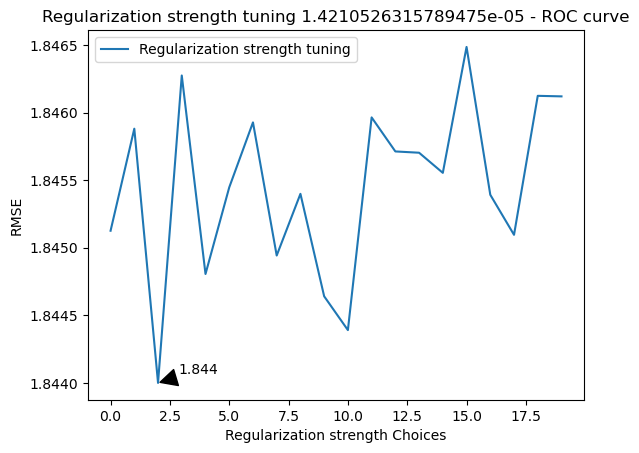

In [89]:
reg_list = list(np.linspace(1e-5,0.00005,20))
rmse_lst=[]

for i in reg_list:
    clf = MLPRegressor(solver=best_solver,
                        hidden_layer_sizes=best_layernumber,
                        learning_rate_init=best_lr_choice,
                        alpha=i,
                        random_state=1,
                        activation='relu',
                        max_iter=1000)

    clf.fit(X_train_norm, y_train_t2_value)
    y_pred = clf.predict(X_valid_norm)
    rmse1 = rmse(y_pred, y_valid_t2_value)
    rmse_lst.append(rmse1)
    
print(reg_list)
index = rmse_lst.index(min(rmse_lst))
plt.plot(list(range(len(reg_list))), rmse_lst, label='Regularization strength tuning')
plt.xlabel('Regularization strength Choices')
plt.ylabel('RMSE')
plt.title(f"Regularization strength tuning {reg_list[index]} - ROC curve")
plt.legend(loc="best")
plt.annotate(np.min(rmse_lst).round(4), (np.argmin(rmse_lst), np.min(rmse_lst)), xycoords="data",
                 xytext=(40, 20), textcoords="offset pixels", arrowprops=dict(facecolor="black", shrink=0.1), fontsize=10,
                 horizontalalignment="center", verticalalignment="top")
plt.show()

In [90]:
index = np.argmin(rmse_lst)
best_reg_choice =  reg_list[index]
best_reg_choice

1.4210526315789475e-05

In [91]:
index = np.argmin(rmse_lst)
best_rs_choice =  rs_list[index]
best_rs_choice

201

## Activation function Choices

['identity', 'logistic', 'tanh', 'relu']


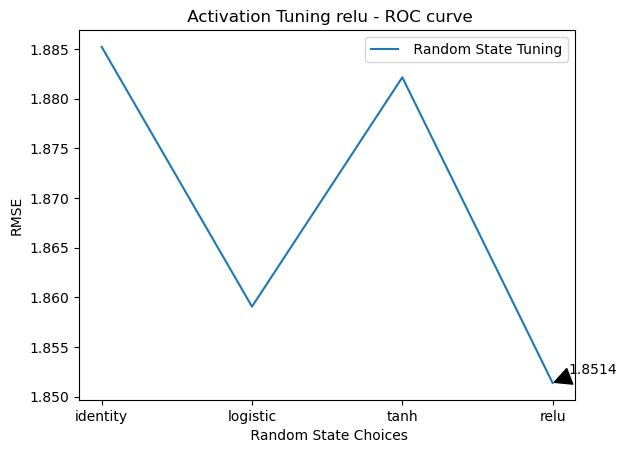

In [92]:
activation_list = ['identity','logistic','tanh','relu']
rmse_lst=[]

for i in activation_list:
    clf = MLPRegressor(solver=best_solver,
                        hidden_layer_sizes=best_layernumber,
                        learning_rate_init=best_lr_choice,
                        alpha=best_reg_choice,
                        random_state=3612,
                        activation=i,
                        max_iter=1000)

    clf.fit(X_train_norm, y_train_t2_value)
    y_pred = clf.predict(X_valid_norm)
    rmse1 = rmse(y_pred, y_valid_t2_value)
    rmse_lst.append(rmse1)
    
print(activation_list)
index = rmse_lst.index(min(rmse_lst))
plt.plot(activation_list, rmse_lst, label=' Random State Tuning')
plt.xlabel(' Random State Choices')
plt.ylabel('RMSE')
plt.title(f" Activation Tuning {activation_list[index]} - ROC curve")
plt.legend(loc="best")
plt.annotate(np.min(rmse_lst).round(4), (np.argmin(rmse_lst), np.min(rmse_lst)), xycoords="data",
                 xytext=(40, 20), textcoords="offset pixels", arrowprops=dict(facecolor="black", shrink=0.1), fontsize=10,
                 horizontalalignment="center", verticalalignment="top")
plt.show()

# Test

In [93]:
X = np.concatenate((X_train_norm,X_valid_norm),axis=0)
y = np.concatenate((y_train_t2_value,y_valid_t2_value),axis=0)

In [94]:
# Final model
reg1 = MLPRegressor(
                   )

reg1.fit(X_train_norm,y_train_t2_value)
y_pred = reg1.predict(X_valid_norm)
rmse(y_pred, y_valid_t2_value)

/home/fish/anaconda3/envs/comp3340/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


2.1079877818500026

In [95]:
y_pred = reg1.predict(X_valid_norm)
rmse(y_pred, y_valid_t2_value)

2.1079877818500026

In [96]:
X_test_norm.describe()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
count,4.790000e+03,4.790000e+03,4.790000e+03,4.790000e+03,4.790000e+03,4.790000e+03,4.790000e+03,4.790000e+03,4.790000e+03,4.790000e+03,...,4.790000e+03,4.790000e+03,4.790000e+03,4.790000e+03,4.790000e+03,4790.000000,4.790000e+03,4.790000e+03,4.790000e+03,4.790000e+03
mean,-8.900327e-18,8.900327e-18,1.186710e-17,-1.483388e-18,1.780065e-17,5.191857e-18,-1.186710e-17,-8.900327e-18,-2.966776e-18,2.966776e-18,...,1.483388e-17,-2.966776e-18,2.966776e-18,2.076743e-17,2.966776e-18,0.000000,-2.966776e-18,1.186710e-17,1.260880e-17,-5.191857e-18
std,1.000104e+00,1.000104e+00,1.000104e+00,1.000104e+00,1.000104e+00,1.000104e+00,1.000104e+00,1.000104e+00,1.000104e+00,1.000104e+00,...,1.000104e+00,1.000104e+00,1.000104e+00,1.000104e+00,1.000104e+00,1.000104,1.000104e+00,1.000104e+00,1.000104e+00,1.000104e+00
min,-3.556379e+00,-2.838142e+00,-1.536457e+01,-1.123871e+00,-1.090785e+00,-2.313471e+00,-5.751566e+00,-3.322662e+00,-3.389959e-01,-2.001751e+00,...,-4.736598e+00,-3.692087e+00,-2.862890e+00,-8.055575e+00,-5.465878e-01,-3.486493,-1.905897e+00,-2.192629e+00,-9.245368e-01,-2.877995e+00
25%,-2.180239e-02,-7.032845e-01,-5.262887e-01,-5.885098e-01,-6.071152e-01,-6.114018e-01,-7.393733e-01,-6.911990e-01,-5.551026e-02,-6.308566e-01,...,-1.652654e-02,-5.599209e-01,-5.723597e-01,-5.290388e-03,-4.676456e-01,-0.040920,-2.174676e-01,-1.241869e-02,-4.422190e-01,-1.051838e-02
50%,-2.180239e-02,-5.918952e-02,1.145892e-01,-3.126732e-01,-2.886012e-01,-2.235298e-01,-1.262113e-01,-1.178589e-01,9.783142e-03,-1.259575e-01,...,-1.652654e-02,5.725481e-02,3.158027e-02,-5.290388e-03,1.610888e-01,-0.040920,-1.852143e-02,-1.241869e-02,-2.010602e-01,-1.051838e-02
75%,8.814692e-01,6.657165e-01,6.985036e-01,1.978024e-01,1.533247e-01,3.545389e-01,6.327947e-01,5.189761e-01,9.783142e-03,4.313781e-01,...,-1.652654e-02,5.509953e-01,3.158050e-01,3.311513e-01,1.610888e-01,-0.040920,-1.852143e-02,-1.241869e-02,1.316425e-01,-1.051838e-02
max,1.198458e+00,3.850336e+00,1.387850e+00,1.040731e+01,6.647926e+00,9.680445e+00,4.374406e+00,5.446387e+00,6.146729e+01,9.016094e+00,...,6.018757e+00,6.846187e+00,1.024923e+01,2.059389e+00,2.952342e+01,5.591317,1.977710e+01,2.526303e+01,2.598879e+01,1.364289e+01


In [97]:
X_test

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,-0.386487,1.078343,-1.848121,-0.697255,-0.654302,-0.415546,-0.524015,0.420901,-0.072186,0.560483,...,-0.016527,1.044736,0.362551,-0.005290,0.161089,3.311502,-0.018521,-0.591049,-0.345755,-0.010518
1,1.198458,-1.207596,-1.384351,-0.287369,-0.642506,-0.559052,-0.374323,-0.240427,0.009783,2.716732,...,1.716615,0.880156,-0.665851,0.468986,-0.504080,-0.040920,-0.661791,-0.012419,-0.345755,-0.010518
2,1.198458,-1.041928,-0.064627,-0.471400,-0.719185,-0.316506,0.175336,-0.520262,0.009783,0.074254,...,0.999591,0.550995,-0.619105,-0.782131,-0.518250,-0.040920,0.226856,-0.012419,0.015983,-0.010518
3,-0.254409,-0.193021,0.438556,-0.069878,0.065303,-0.504732,-0.030925,0.590310,-0.030497,-1.374898,...,-0.016527,-0.313051,0.031580,-0.005290,0.161089,0.409919,-0.018521,-0.167774,-0.056365,-0.010518
4,1.198458,0.609900,0.486115,-0.371019,-0.188328,-1.076484,-1.661421,0.618287,0.009783,-1.507419,...,-0.016527,-0.189615,-0.151650,0.585616,-0.524322,-0.040920,1.115503,-0.012419,-0.779841,-0.010518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4785,-0.021802,0.039085,-0.185843,0.030502,1.864317,-0.652028,-0.414839,0.214338,-0.038835,1.022877,...,-0.016527,1.785347,0.409296,0.649232,0.161089,-0.040920,0.626747,-0.179214,-0.490451,-0.010518
4786,-0.021802,-0.703382,1.387850,2.309134,0.153325,4.821196,1.982481,-0.009874,0.009783,2.738978,...,-0.016527,-0.806791,0.502787,-0.005290,0.161089,-0.040920,-0.018521,-0.012419,0.131643,-0.010518
4787,-0.021802,0.702026,0.276190,-0.697255,-0.007837,-0.202474,-0.193095,-0.021898,-0.055510,-1.448309,...,-0.016527,-0.806791,0.031580,-0.005290,0.161089,-0.040920,-0.018521,-0.138031,0.175148,-1.334643
4788,-0.021802,-0.722627,-1.297502,0.381833,-0.666099,0.048931,0.716918,1.066594,0.009783,0.725737,...,-0.016527,-0.313051,0.269060,1.522187,0.161089,-0.040920,-0.913575,-0.012419,-0.635146,-0.010518


In [98]:

result = reg1.predict(X_test_norm)
res1 = pd.DataFrame(result.tolist(), columns=["Predicted"])
res1.index = final_index
res1.index.name = 'Id'
pd.DataFrame(res1).to_csv('out12col.csv')
#print(torch.count_nonzero(torch.from_numpy(np.array(res1)).to(torch.float32)))
res1

,Predicted
Id,
32_175413_295037,3.843334
33_176176_296681,3.543536
42_119203_210828,2.150945
44_181750_291554,1.172765
61_176332_252348,2.195840
...,...
99883_150755_276467,4.975330
99897_162913_266801,3.015082
99913_175989_292375,0.714909
